# SHORT CUT
##### ctrl + enter : 현재 셸만 실행
##### shift + enter : 현재 셸 실행 후 아래에 새로운 셸 생성
##### esc : 명령어 모드로 진입
##### a : 현재 셸 위에 새로운 셸 생성
##### b : 현재 셸 아래에 새로운 셸 생성
##### m : 마크다운 모드
##### x : 현재 셸 삭제
##### dd : 현재 셸 삭제
##### j : 아래로 이동
##### k : 위로 이동
##### l : 줄번호 새기기

In [2]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
fish_data = [[l,w] for l,w in zip(fish_length, fish_weight)]   #for 앞의 l,w와 뒤의 l,w는 같은 변수이다
fish_target = ["도미"] * 35 + ["빙어"] * 14

#### zip()메소드는 나열된 리스트에서 원소를 하나씩 꺼내주는 메소드이다.

In [4]:
from sklearn.neighbors import KNeighborsClassifier   #k-최접근 이웃 모델
kn = KNeighborsClassifier()   #KNeighborsClassifier() 객체 생성

##### from 패키지 import 클래스 >>> 패키지 내의 특정 클래스만 사용한다는 뜻

In [10]:
train_input = fish_data[:35]
train_target = fish_data[:35]
test_input = fish_data[35:]
test_target = fish_data[35:]

In [11]:
import numpy as np   #대표적인 배열 라이브러리

In [27]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [28]:
print(input_arr)
print(input_arr.shape)   #shape : 배열의 크기를 알려줌, 결과값 : (샘플 수(행), 특성 수(열))

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


In [29]:
np.random.seed(42)
index = np.arange(49)   #arange(N) : 0에서 N-1까지 1씩 증가하는 배열을 생성
np.random.shuffle(index)   #np(라이브러리).random(패키지).shuffle(메소드) : 배열을 무작위로 섞는다

In [30]:
print(index)   #잘 섞였나 확인

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [31]:
train_input = input_arr[index[:35]]   #0~34까지를 train
train_target = target_arr[index[:35]]

In [32]:
test_input = input_arr[index[35:]]   #35~48까지를 test
test_target = target_arr[index[35:]]

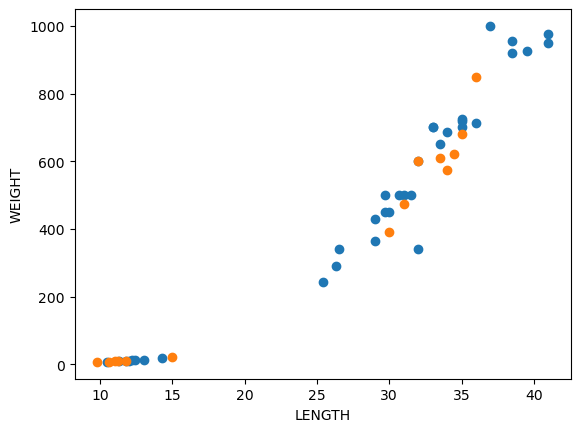

In [33]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])   #train
plt.scatter(test_input[:, 0], test_input[:, 1])   #test
plt.xlabel("LENGTH")
plt.ylabel("WEIGHT")
plt.show()

In [35]:
kn = kn.fit(train_input, train_target)   #모델 훈련

In [36]:
kn.score(test_input, test_target)

C:\Users\cbnul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


1.0

In [39]:
kn.predict(test_input)   #테스트셋의 예측 결과

C:\Users\cbnul\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['빙어', '빙어', '도미', '빙어', '도미', '도미', '도미', '빙어', '도미', '도미', '빙어',
       '도미', '도미', '빙어'], dtype='<U2')

In [40]:
test_target   #실제 타겟

array(['빙어', '빙어', '도미', '빙어', '도미', '도미', '도미', '빙어', '도미', '도미', '빙어',
       '도미', '도미', '빙어'], dtype='<U2')

#### kn.predict(test_input) 과 test_target 이 동일하다. accuracy = 1.0 (100%)